In [1]:
%matplotlib inline

# Evaluating defense performance on passing plays


<img src="https://upload.wikimedia.org/wikipedia/en/thumb/a/a2/National_Football_League_logo.svg/1024px-National_Football_League_logo.svg.png" width="300">


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import os

In [3]:
matplotlib.rcParams['figure.dpi']=90
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

## Objectives


* Find best NFL player against the pass
* Find markers (such as speed, position, hieght, weight) to predict player performance
* Find effective defenses agains different types of offensive plays

## Exploring the data


In [4]:
file_list=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
#     print ('\n',dirname, filenames)
#     print ('\nThe next loop starts:\n')
    for filename in filenames:
        file_list.append(os.path.join(dirname, filename))

In [5]:
weeks = [] 
find_weeks = [weeks.append(file_list[i])  for i in range(len(file_list)) if 'week' in file_list[i]]
rest = list(set(weeks)^set(file_list))
rest.sort()
games_file = rest[0]
players_file = rest[1]
plays_file = rest[2]


In [6]:
print ('\n',games_file)
print ('\n', players_file)
print ('\n', plays_file)
print ('\nweeks',weeks)


 /kaggle/input/nfl-big-data-bowl-2021/games.csv

 /kaggle/input/nfl-big-data-bowl-2021/players.csv

 /kaggle/input/nfl-big-data-bowl-2021/plays.csv

weeks ['/kaggle/input/nfl-big-data-bowl-2021/week11.csv', '/kaggle/input/nfl-big-data-bowl-2021/week14.csv', '/kaggle/input/nfl-big-data-bowl-2021/week12.csv', '/kaggle/input/nfl-big-data-bowl-2021/week9.csv', '/kaggle/input/nfl-big-data-bowl-2021/week16.csv', '/kaggle/input/nfl-big-data-bowl-2021/week10.csv', '/kaggle/input/nfl-big-data-bowl-2021/week7.csv', '/kaggle/input/nfl-big-data-bowl-2021/week17.csv', '/kaggle/input/nfl-big-data-bowl-2021/week1.csv', '/kaggle/input/nfl-big-data-bowl-2021/week15.csv', '/kaggle/input/nfl-big-data-bowl-2021/week4.csv', '/kaggle/input/nfl-big-data-bowl-2021/week13.csv', '/kaggle/input/nfl-big-data-bowl-2021/week2.csv', '/kaggle/input/nfl-big-data-bowl-2021/week5.csv', '/kaggle/input/nfl-big-data-bowl-2021/week6.csv', '/kaggle/input/nfl-big-data-bowl-2021/week8.csv', '/kaggle/input/nfl-big-data-bowl-20

- There are 4 different types of files 
    * `games.csv`: contains the teams playing in each game.
    * `players.csv`: contains player-level information from players that participated in any of the tracking data files.
    * `plays.csv`: contains play-level information from each game
    * `week#.csv`: contain player tracking data from all games in week `#`. In a typical NFL season there are 17 weeks, therefore 17 data frames with player tracking data are provided.

In [7]:
games_df = pd.read_csv(games_file)
players_df = pd.read_csv(players_file)
plays_df = pd.read_csv(plays_file)

In [8]:
print ('columns in games.csv file: ',games_df.columns)
print ()
print ('columns in players.csv file:',players_df.columns)
print ()
print ('columns in plays.csv file: ',plays_df.columns)

columns in games.csv file:  Index(['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr', 'week'],
      dtype='object')

columns in players.csv file: Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

columns in plays.csv file:  Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')


## **1- Game data**

### consisted of ['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr','visitorTeamAbbr', 'week']

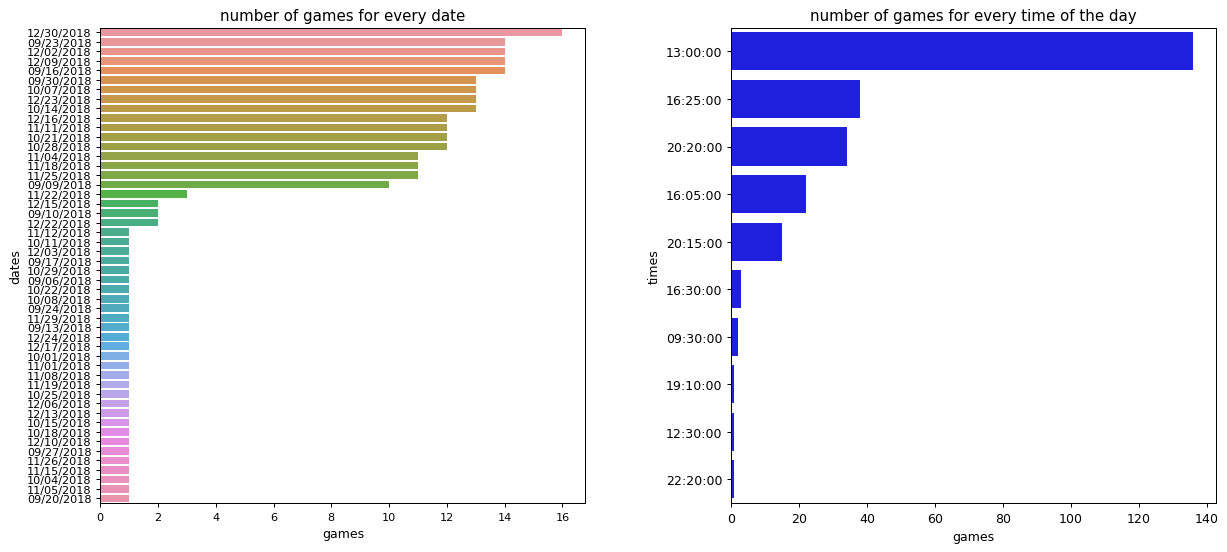

In [9]:
fig1,axs1=plt.subplots(1,2,gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(16,7))

explr1 = games_df['gameDate'].value_counts().reset_index()
explr1.columns = ['dates','games']

explr2 = games_df['gameTimeEastern'].value_counts().reset_index()
explr2.columns = ['times','games']


sns.barplot(y='dates', x='games', data=explr1, ax = axs1[0])
axs1[0].set_title('number of games for every date')
axs1[0].tick_params(axis='both', which='major', labelsize=9)

sns.barplot(y='times', x='games', data=explr2, color = 'blue', ax = axs1[1])
axs1[1].set_title('number of games for every time of the day')

plt.show()

## 2- Player data

### Is consisted of ['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position','displayName']

In [10]:
players_df.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

In [11]:
players_df[['height']]

,height
0,72
1,70
2,69
3,73
4,75
...,...
1298,6-2
1299,6-2
1300,78
1301,69


### All values in the height column are not in the same format. Let's make them all in the same format 

In [12]:
explr2 = players_df['height'].str.split('-',expand=True)
#here we are splitting the '-' and making a second column out of it. i.e. the height is now two columns
explr2.columns = ['first', 'second']
explr2

,first,second
0,72,None
1,70,None
2,69,None
3,73,None
4,75,None
...,...,...
1298,6,2
1299,6,2
1300,78,None
1301,69,None


In [13]:
#here we are combining the first and second columns together to one single integer vlaues for the heights
explr2.loc[(explr2['second'].notnull()), 'first'] = explr2[explr2['second'].notnull()][
    'first'].astype(np.int16) * 12 + explr2[explr2['second'].notnull()]['second'].astype(np.int16)

In [14]:
explr2

,first,second
0,72,None
1,70,None
2,69,None
3,73,None
4,75,None
...,...,...
1298,74,2
1299,74,2
1300,78,None
1301,69,None


In [15]:
players_df['height'] = explr2['first']
players_df['height'] = players_df['height'].astype(np.float32)
players_df['height'] /= 12

players_df

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,6.000000,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,5.833333,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,5.750000,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,6.083333,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,6.250000,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6.166667,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6.166667,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,6.500000,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,5.750000,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


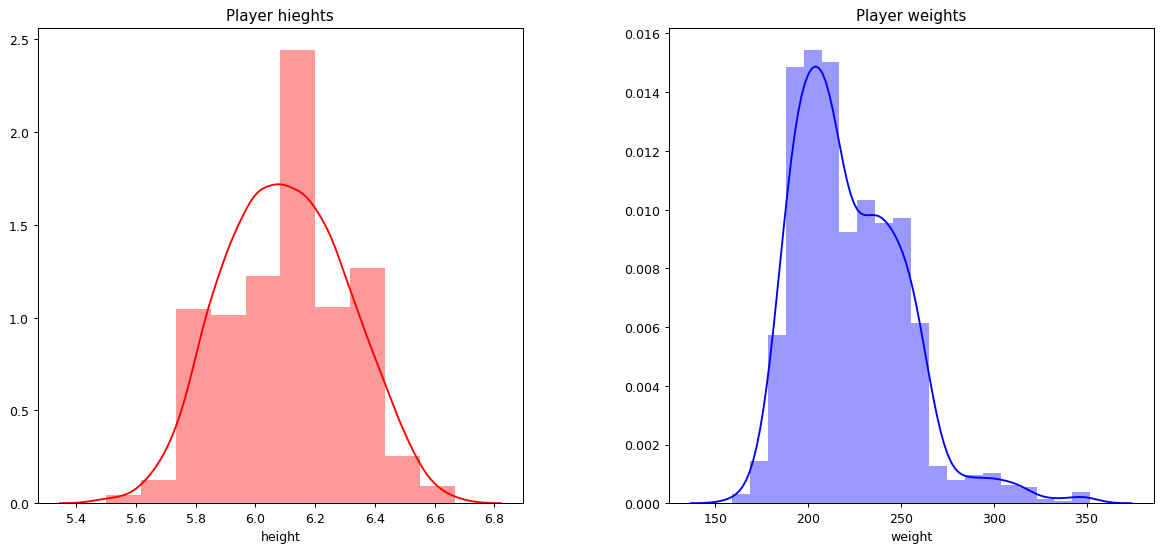

In [91]:
fig2,axs2=plt.subplots(1,2,gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(16,7))

sns.distplot(players_df['height'], bins=10,kde=True, ax = axs2[0], color='red')
axs2[0].set_title('Player hieghts')

sns.distplot(players_df['weight'], bins=20,kde=True, ax = axs2[1], color='blue')
axs2[1].set_title('Player weights')

plt.show()

## 3- Weeks data

In [92]:
week_dfs = list()
for week in weeks:
    week_dfs.append(pd.read_csv(week))
weeks = pd.concat(week_dfs)

weeks.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'time'

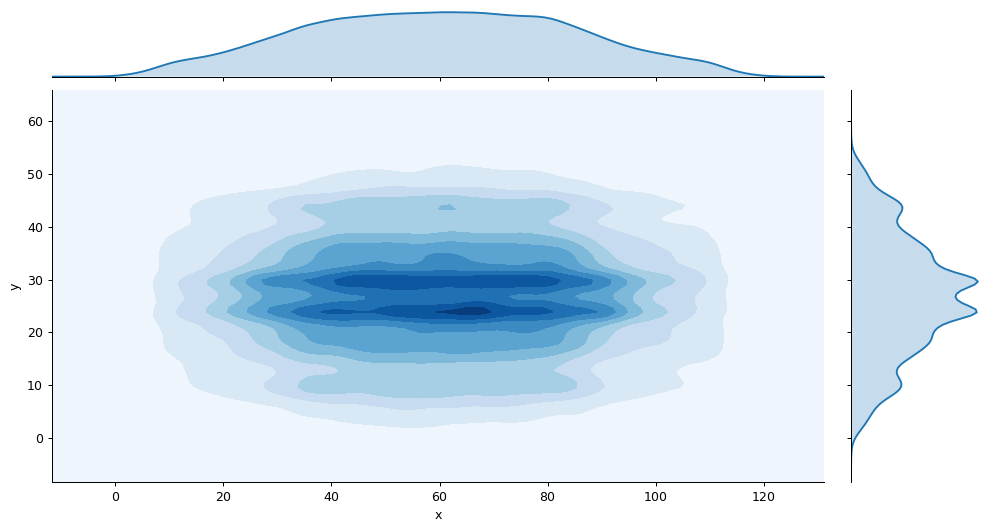

In [30]:
my_plot=sns.jointplot(
    data=weeks.sample(n=100000),
    x="x", y="y", cmap='Blues',
    kind="kde"
)
my_plot.fig.set_figwidth(12)
my_plot.fig.set_figheight(6)
plt.show()